# Import libraries 

In [1]:
# Uncomment the below line and Install 'mlxtend' Library if not installed already
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import mlxtend

In [3]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

import matplotlib.pyplot as plt

In [4]:
from google.colab import files
uploaded = files.upload()

titanic = pd.read_csv("Titanic.csv")
titanic.head()

Saving Titanic.csv to Titanic.csv


,Class,Gender,Age,Survived
0,3rd,Male,Child,No
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
4,3rd,Male,Child,No


In [5]:
titanic['Class'].value_counts()

Crew    885
3rd     706
1st     325
2nd     285
Name: Class, dtype: int64

# Pre-Processing
As the data is not in transaction formation 
We are using transaction Encoder

In [6]:
df=pd.get_dummies(titanic)
df.head()

,Class_1st,Class_2nd,Class_3rd,Class_Crew,Gender_Female,Gender_Male,Age_Adult,Age_Child,Survived_No,Survived_Yes
0,0,0,1,0,0,1,0,1,1,0
1,0,0,1,0,0,1,0,1,1,0
2,0,0,1,0,0,1,0,1,1,0
3,0,0,1,0,0,1,0,1,1,0
4,0,0,1,0,0,1,0,1,1,0


# Apriori Algorithm 

In [7]:
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.147660,(Class_1st)
1,0.129487,(Class_2nd)
2,0.320763,(Class_3rd)
3,0.402090,(Class_Crew)
4,0.213539,(Gender_Female)
5,0.786461,(Gender_Male)
6,0.950477,(Age_Adult)
7,0.676965,(Survived_No)
8,0.323035,(Survived_Yes)
9,0.144934,"(Age_Adult, Class_1st)"


In [8]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules
rules.sort_values('lift',ascending = False)

## leverage(X->Y) - Support(X->Y)-Support(X).Support(Y) [-1 to +1].
## leverage is a proportion of additional elements covered by both the antecedent and consequence above the expected if independent.
## Conviction(X->Y) - (Support(X).Support(NotY))/(Support(X & NotY)).
## Conviction is a measure of the implication and has value 1 if items are unrelated.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
45,"(Age_Adult, Gender_Female)",(Survived_Yes),0.193094,0.323035,0.143571,0.743529,2.301699,0.081195,2.639542
46,(Survived_Yes),"(Age_Adult, Gender_Female)",0.323035,0.193094,0.143571,0.444444,2.301699,0.081195,1.452431
11,(Gender_Female),(Survived_Yes),0.213539,0.323035,0.156293,0.731915,2.265745,0.087312,2.525187
10,(Survived_Yes),(Gender_Female),0.323035,0.213539,0.156293,0.483826,2.265745,0.087312,1.523634
47,(Gender_Female),"(Survived_Yes, Age_Adult)",0.213539,0.297138,0.143571,0.672340,2.262724,0.080121,2.145099
...,...,...,...,...,...,...,...,...,...
20,(Gender_Male),"(Class_3rd, Survived_No)",0.786461,0.239891,0.191731,0.243790,1.016252,0.003066,1.005156
17,(Survived_No),(Age_Adult),0.676965,0.950477,0.653339,0.965101,1.015386,0.009900,1.419023
16,(Age_Adult),(Survived_No),0.950477,0.676965,0.653339,0.687380,1.015386,0.009900,1.033317
13,(Gender_Male),(Age_Adult),0.786461,0.950477,0.757383,0.963027,1.013204,0.009870,1.339441


In [9]:
rules.sort_values('lift')[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
13,(Gender_Male),(Age_Adult),0.786461,0.950477,0.757383,0.963027,1.013204,0.009870,1.339441
12,(Age_Adult),(Gender_Male),0.950477,0.786461,0.757383,0.796845,1.013204,0.009870,1.051116
17,(Survived_No),(Age_Adult),0.676965,0.950477,0.653339,0.965101,1.015386,0.009900,1.419023
16,(Age_Adult),(Survived_No),0.950477,0.676965,0.653339,0.687380,1.015386,0.009900,1.033317
20,(Gender_Male),"(Class_3rd, Survived_No)",0.786461,0.239891,0.191731,0.243790,1.016252,0.003066,1.005156
19,"(Class_3rd, Survived_No)",(Gender_Male),0.239891,0.786461,0.191731,0.799242,1.016252,0.003066,1.063667
52,(Age_Adult),"(Survived_No, Gender_Male)",0.950477,0.619718,0.603816,0.635277,1.025106,0.014788,1.042660
49,"(Survived_No, Gender_Male)",(Age_Adult),0.619718,0.950477,0.603816,0.974340,1.025106,0.014788,1.929980
24,(Class_3rd),"(Age_Adult, Survived_No)",0.320763,0.653339,0.216265,0.674221,1.031961,0.006698,1.064097
23,"(Age_Adult, Survived_No)",(Class_3rd),0.653339,0.320763,0.216265,0.331015,1.031961,0.006698,1.015325


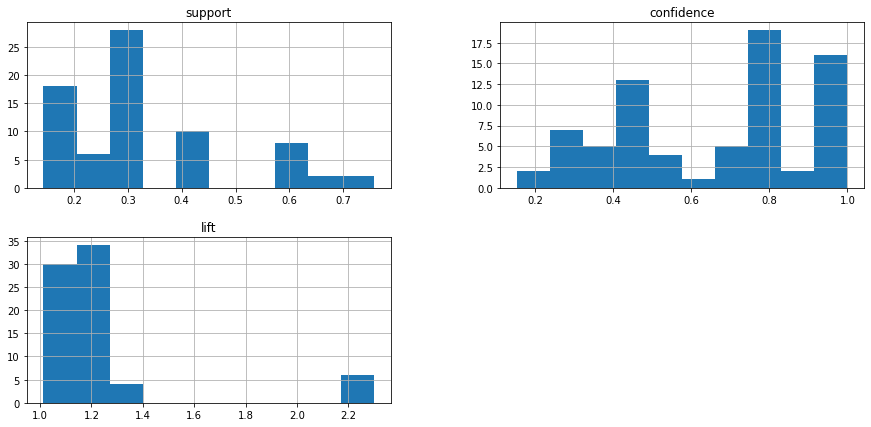

In [10]:
import matplotlib.pyplot as plt
rules[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

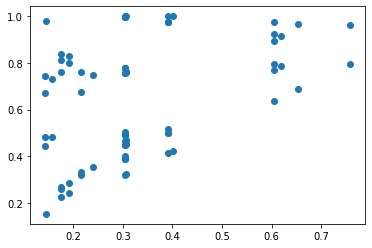

In [11]:
import matplotlib.pyplot as plt

plt.scatter(rules['support'], rules['confidence'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


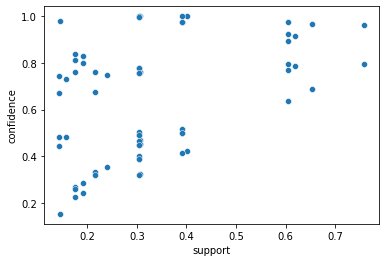

In [12]:
import seaborn as sns

sns.scatterplot('support', 'confidence', data=rules,)

plt.show()

In [13]:
rules.sort_values(by='lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
45,"(Age_Adult, Gender_Female)",(Survived_Yes),0.193094,0.323035,0.143571,0.743529,2.301699,0.081195,2.639542
46,(Survived_Yes),"(Age_Adult, Gender_Female)",0.323035,0.193094,0.143571,0.444444,2.301699,0.081195,1.452431
11,(Gender_Female),(Survived_Yes),0.213539,0.323035,0.156293,0.731915,2.265745,0.087312,2.525187
10,(Survived_Yes),(Gender_Female),0.323035,0.213539,0.156293,0.483826,2.265745,0.087312,1.523634
47,(Gender_Female),"(Survived_Yes, Age_Adult)",0.213539,0.297138,0.143571,0.672340,2.262724,0.080121,2.145099
...,...,...,...,...,...,...,...,...,...
20,(Gender_Male),"(Class_3rd, Survived_No)",0.786461,0.239891,0.191731,0.243790,1.016252,0.003066,1.005156
17,(Survived_No),(Age_Adult),0.676965,0.950477,0.653339,0.965101,1.015386,0.009900,1.419023
16,(Age_Adult),(Survived_No),0.950477,0.676965,0.653339,0.687380,1.015386,0.009900,1.033317
13,(Gender_Male),(Age_Adult),0.786461,0.950477,0.757383,0.963027,1.013204,0.009870,1.339441
